# **Introduction**

**Carbon Dioxide (CO<sub>2</sub>)** and **Greenhouse Gas (GHG)** emissions as a result of human activities have been demonstrated to be the primary driver of today's climate change. Supporting evidence of this is the fact that global average temperatures have increased by more than 1 °C since pre-industrual times.

A changing climate has a range of potential ecological, physical, and health impacts, including extreme weather events (such as floods, droughts, storms, and heatwaves); sea-level rise; altered crop growth; and disrupted water systems<sup>1</sup>.

Therefore, as part of the [2015 Paris Agreement](https://www.un.org/en/climatechange/paris-agreement), most of the countries have started to keep track of their CO<sub>2</sub> and GHG contribution to the atmosphere. This is with the purpose of making decisions that allow the mitigation of each country's carbon footprint and preserve Earth's future biodiversity.

### **Main Objective:** 

The main purpose of this project is to apply data cleaning and pre-processing techniques with Python, and further perform Exploratory Data Analysis on a CO<sub>2</sub> emissions data in order to obtain valuable insights on a significant and pressing worldwide issue.

## **About the dataset**

This dataset was obtained from a public GitHub repository of [Our World In Data](https://github.com/owid/co2-data), a non-governmental organization (NGO) which aims to provide a wide range of insights and relevant information regarding several world problems.

A detailed description of every single feature of the dataset can be read in the "`data/owid-co2-codebook.xlsx`" file.

## **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import urllib.request

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

# Magic function to display matplotlib figures in a jupyter notebook
%matplotlib inline

# Making plots pretty!
sns.set_style("darkgrid")

## **Saving and reading the data locally**

In [ ]:
# Data set url
owid_co2_data_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
owid_co2_codebook_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-codebook.csv"

In [ ]:
# Downloading data from url into ./data/ directory
urllib.request.urlretrieve(
    url = owid_co2_data_url,
    filename = "./data/owid-co2-data.csv"
)

In [ ]:
# Downloading codebook from url into ./data/ directory
urllib.request.urlretrieve(
    url = owid_co2_codebook_url,
    filename = "./data/owid-co2-codebook.csv"
)

In [ ]:
# Converting codebook csv file into excel file and saving it into ./data/ directory
codebook_df = pd.read_csv("./data/owid-co2-codebook.csv")
codebook_excel = pd.ExcelWriter("./data/owid-co2-codebook.xlsx")
codebook_df.to_excel(codebook_excel, index=False)
codebook_excel.save()

In [ ]:
# To specify the number of rows and columns to be displayed by pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
# Reading and visualizing the first 5 rows of the CO2 data set
missing_values = [0, -0.000]
data = pd.read_csv("./data/owid-co2-data.csv", na_values=missing_values)

data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

Some data sets can have column names with different formats, such as upper cases, lower cases, spaces, symbols, etc. In this case, the column names have already been standardized, so there's no need to do that.

In [ ]:
# Checking which features are different than float type
data.dtypes[data.dtypes != "float64"]

All the columns are float type objects except **`'country'`**, **`'year'`** and **`'iso_code'`** which are differents.

## **Using Pandas API extension for EDA**

### **Missing values analysis**

In [3]:
co2_df = data.copy(deep = True)

In [4]:
%run pd-extensions.ipynb

In [5]:
# Total number of missing values in the dataset
total_missing = co2_df.explore.number_missing()
print(f"There are {total_missing} missing values in the dataset.")

There are 2264752 missing values in the dataset.


In [6]:
# Summary table of missing values per variable
co2_df.explore.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,country,0,46523,0.00
1,year,0,46523,0.00
2,iso_code,6661,46523,14.32
3,population,7949,46523,17.09
4,gdp,31972,46523,68.72
...,...,...,...,...
69,share_global_other_co2,44198,46523,95.00
70,total_ghg,40379,46523,86.79
71,total_ghg_excluding_lucf,40374,46523,86.78
72,trade_co2,42368,46523,91.07


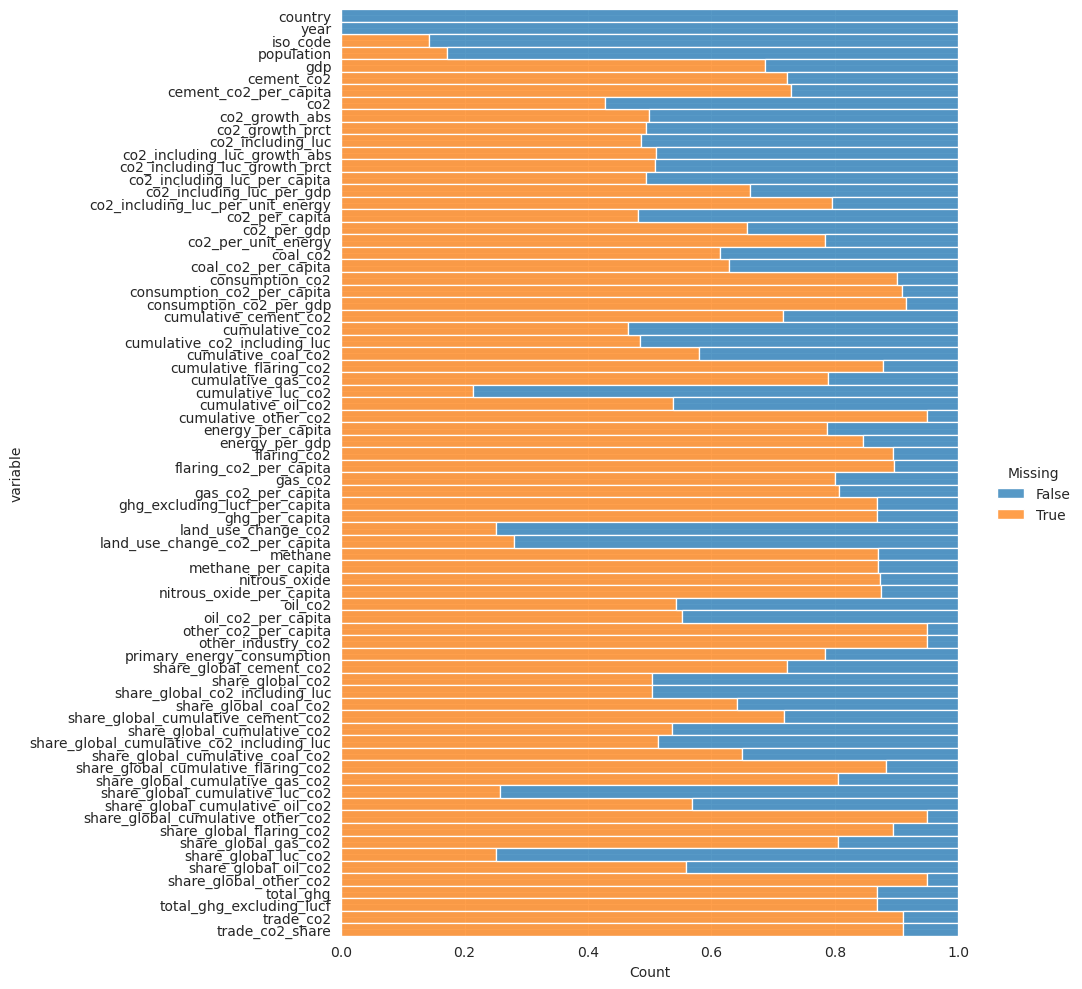

In [7]:
# Visualizing the proportion of missing values per variable
co2_df.explore.missing_variable_plot()

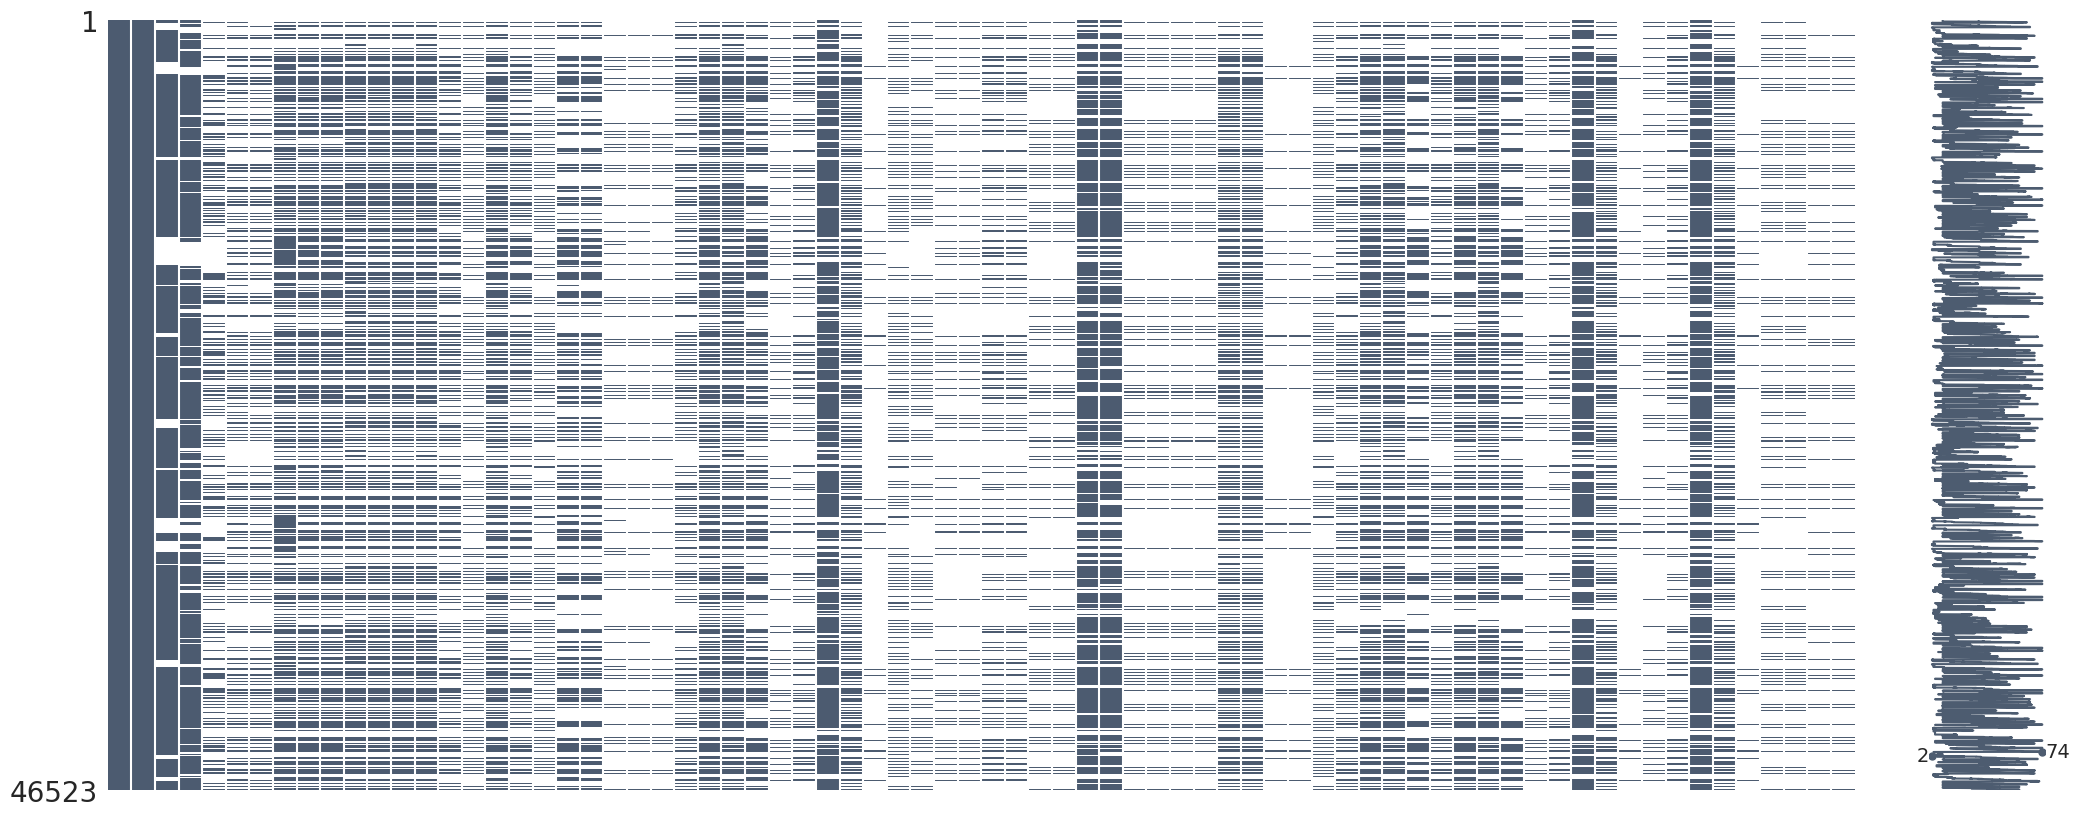

In [8]:
co2_df.explore.missing_variable_plot_matrix()

There are many columns practically empty. Hence, for the purposes of this project, some of those columns will be manually deleted since they don't provide much information.

# **Data Pre-processing**

As a standardized unit of measurement, CO<sub>2</sub> emissions are technically called '**emissions of equivalent CO<sub>2</sub>**'. This is because the measurement not only accounts for the emissions of Carbon Dioxide gas alone, but also for gases such as **Methane (CH<sub>4</sub>)**, **Nitrous Oxide (N<sub>2</sub>O)**, **Sulphur hexafluoride (SF<sub>6</sub>)**, and several others. Since the scope of this project will not include an analysis of each type of gas, and being that there is not a significant amount of data for them in the dataset, these columns will be deleted too.

The original dataset is being kept unmodified for future analysis that include all these variables nonetheless.

In [9]:
columns_to_delete = [
    'co2_including_luc_growth_abs',
    'co2_including_luc_growth_prct',
    'co2_including_luc_per_capita',
    'co2_including_luc_per_gdp',
    'co2_including_luc_per_unit_energy',
    'consumption_co2',
    'consumption_co2_per_capita',
    'consumption_co2_per_gdp',
    'cumulative_co2_including_luc',
    'cumulative_luc_co2',
    'flaring_co2',
    'flaring_co2_per_capita',
    'ghg_excluding_lucf_per_capita',
    'ghg_per_capita',
    'methane',
    'methane_per_capita',
    'nitrous_oxide',
    'nitrous_oxide_per_capita',
    'share_global_co2_including_luc',
    'share_global_cumulative_cement_co2',
    'share_global_cumulative_co2',
    'share_global_cumulative_co2_including_luc',
    'share_global_cumulative_coal_co2',
    'share_global_cumulative_gas_co2',
    'share_global_cumulative_flaring_co2',
    'share_global_cumulative_luc_co2',
    'share_global_cumulative_other_co2',
    'share_global_cumulative_oil_co2',
    'share_global_luc_co2',
    'total_ghg',
    'total_ghg_excluding_lucf',
    'trade_co2',
    'trade_co2_share'
]

co2_df.drop(
    columns = columns_to_delete,
    axis = 1,
    inplace = True
)

### **Year column**

In [10]:
# Checking minimum and maximum year
print("min year:", co2_df["year"].min())
print("max year:", co2_df["year"].max())

min year: 1750
max year: 2021


In [11]:
np.sort(co2_df["year"].unique())

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

The data registered dates back since the late 18th century, beginning of the Industrial Revolution.

In [12]:
# Checking missing values in the year column
years_missing = co2_df["year"].isnull().sum()
print(f"There are {years_missing} missing values in the year column.")

There are 0 missing values in the year column.


### **ISO code column**

In [13]:
# Checking missing values in the ISO code column
iso_codes_missing = co2_df["iso_code"].isnull().sum()
print(f"There are {iso_codes_missing} missing values in the iso_code column.")

There are 6661 missing values in the iso_code column.


In [14]:
# Checking countries without an ISO code
co2_df[co2_df["iso_code"].isnull()]["country"].unique()

array(['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Central America (GCP)', 'Europe',
       'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (27) (GCP)',
       'European Union (28)', 'French Equatorial Africa (GCP)',
       'French West Africa (GCP)', 'High-income countries',
       'International transport', 'Kosovo', 'Kuwaiti Oil Fires (GCP)',
       'Leeward Islands (GCP)', 'Low-income countries',
       'Lower-middle-income countries', 'Middle East (GCP)',
       'Non-OECD (GCP)', 'North America', 'North America (GCP)',
       'North America (excl. USA)', 'OECD (GCP)', 'Oceania',
       'Oceania (GCP)', 'Panama Canal Zone (GCP)', 'Ryukyu Islands (GCP)',
       'South America', 'South America (GCP)',
       'St. Kitts-Nevis-Anguilla (GCP)', 'Upper-middle-income countries',
       'World'], dtype=object)

In [15]:
non_iso_code_countries = [
    'Africa (GCP)',
    'Asia (GCP)',
    'Central America (GCP)',
    'Europe (GCP)',
    'Europe (excl. EU-27)',
    'Europe (excl. EU-28)',
    'European Union (27)',
    'European Union (27) (GCP)',
    'European Union (28)',
    'French Equatorial Africa (GCP)',
    'French West Africa (GCP)',
    'International transport',
    'Kosovo',
    'Kuwaiti Oil Fires (GCP)',
    'Leeward Islands (GCP)',
    'Middle East (GCP)',
    'Non-OECD (GCP)',
    'North America (GCP)',
    'OECD (GCP)',
    'Oceania (GCP)',
    'Panama Canal Zone (GCP)',
    'Ryukyu Islands (GCP)',
    'St. Kitts-Nevis-Anguilla (GCP)',
]

# for country in non_iso_code_countries:
#     co2 = co2_df[
#         (co2_df["country"] == country) & ~(co2_df["co2"].isnull())
#     ]["co2"].sum()
#     print(f"CO2 Emssions: {country} = {np.round(co2, 3)}")

For the sake of simplification, the data of these countries won't be taken into consideration due to their relatively small contribution to global CO<sub>2</sub> emissions. Additionally, the data of '**European Union (27)**', '**European Union (28)**', and those continents/countries with the **(GCP)** suffix will also be deleted since their data has already been recorded in the continents/countries with no such suffix.

In [16]:
# Dropping the countries
for country in non_iso_code_countries:
    value = co2_df[
        co2_df["country"] == country
    ].index
    
    co2_df.drop(
        labels = value,
        axis = 0,
        inplace = True
    )

In [17]:
# Checking missing values in the ISO code column
iso_codes_missing = co2_df["iso_code"].isnull().sum()
print(f"There are {iso_codes_missing} missing values in the iso_code column.")

There are 3708 missing values in the iso_code column.


### **CO<sub>2</sub> Emissions column**

In [18]:
# Checking missing values in the co2 column
co2_missing = co2_df["co2"].isnull().sum()
print(f"There are {co2_missing} missing values in the co2 column.")

There are 19721 missing values in the co2 column.


In [19]:
# Creating a df with a percentage of missing values in the co2 column per country
temp_df = co2_df[["country", "year", "co2"]]

pct_missing_per_country_df = (
    temp_df
    .groupby("country")
    .count()
    .reset_index()
    .rename(columns={"year": "total_entries", "co2": "not_nans"})
    .assign(
        nans = lambda x: x["total_entries"] - x["not_nans"],
        pct_missing = lambda x: np.round(100 - (x["not_nans"] / x["total_entries"]) * 100, 2)
    )
)

print(pct_missing_per_country_df.head(10))
print("\nTotal countries with CO2 NaN's: ", len(pct_missing_per_country_df))

          country  total_entries  not_nans  nans  pct_missing
0     Afghanistan            172        73    99        57.56
1          Africa            272       138   134        49.26
2   Aland Islands            172         0   172       100.00
3         Albania            172        89    83        48.26
4         Algeria            172       106    66        38.37
5  American Samoa            172         0   172       100.00
6         Andorra            272        32   240        88.24
7          Angola            172        72   100        58.14
8        Anguilla            172        32   140        81.40
9      Antarctica             21        21     0         0.00

Total countries with CO2 NaN's:  246


In [20]:
# Filtering countries with more than 80% of CO2 missing entries
countries_to_delete = pct_missing_per_country_df[pct_missing_per_country_df["pct_missing"] > 80]["country"].values
print(countries_to_delete)

['Aland Islands' 'American Samoa' 'Andorra' 'Anguilla' 'Eritrea'
 'Falkland Islands' 'Guernsey' 'Isle of Man' 'Jersey' 'Lesotho' 'Mayotte'
 'Namibia' 'Netherlands Antilles' 'Palestine' 'Puerto Rico'
 'Saint Martin (French part)' 'Svalbard and Jan Mayen' 'Timor'
 'Turks and Caicos Islands' 'Tuvalu' 'United States Virgin Islands'
 'Western Sahara']


In [21]:
# Deleting these countries from the dataset
for country in countries_to_delete:
    value = co2_df[
        co2_df["country"] == country
    ].index
    
    co2_df.drop(
        labels = value,
        axis = 0,
        inplace = True
    )

In [22]:
# Checking missing values in the co2 column
co2_missing = co2_df["co2"].isnull().sum()
print(f"There are {co2_missing} missing values in the co2 column.")

There are 15947 missing values in the co2 column.


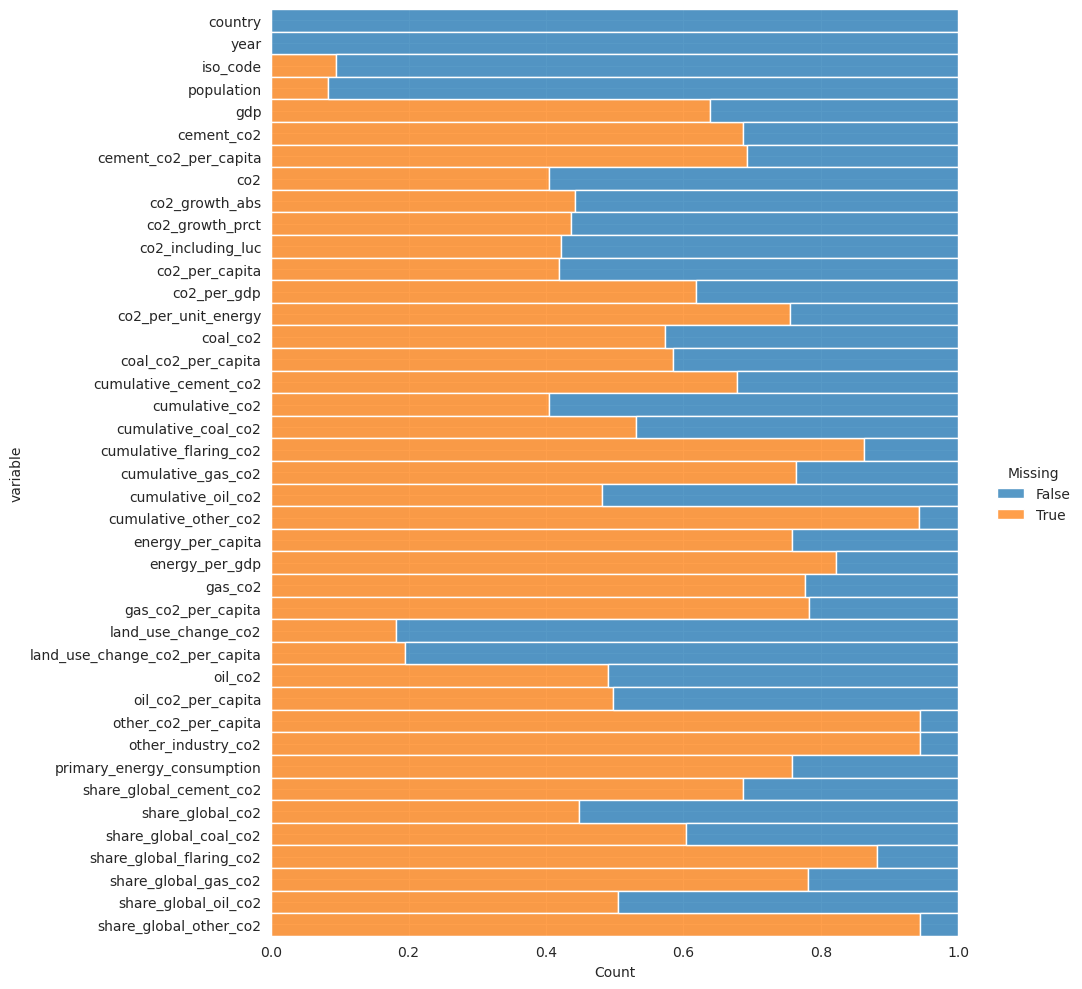

In [24]:
# Visualizing the proportion of missing values per variable
co2_df.explore.missing_variable_plot()

### **GDP column**

In [25]:
# Checking missing values in the gdp column
gdp_missing = co2_df["gdp"].isnull().sum()
print(f"There are {gdp_missing} missing values in the gdp column.")

There are 25213 missing values in the gdp column.


In [26]:
# Filling GDP missing values for countries with co2 and co2_per_gdp entries.
co2_df["gdp"].fillna(
    co2_df["co2"] / co2_df["co2_per_gdp"],
    inplace = True
)

In [27]:
# Checking missing values in the gdp column
gdp_missing = co2_df["gdp"].isnull().sum()
print(f"There are {gdp_missing} missing values in the gdp column.")

There are 23397 missing values in the gdp column.


<AxesSubplot:>

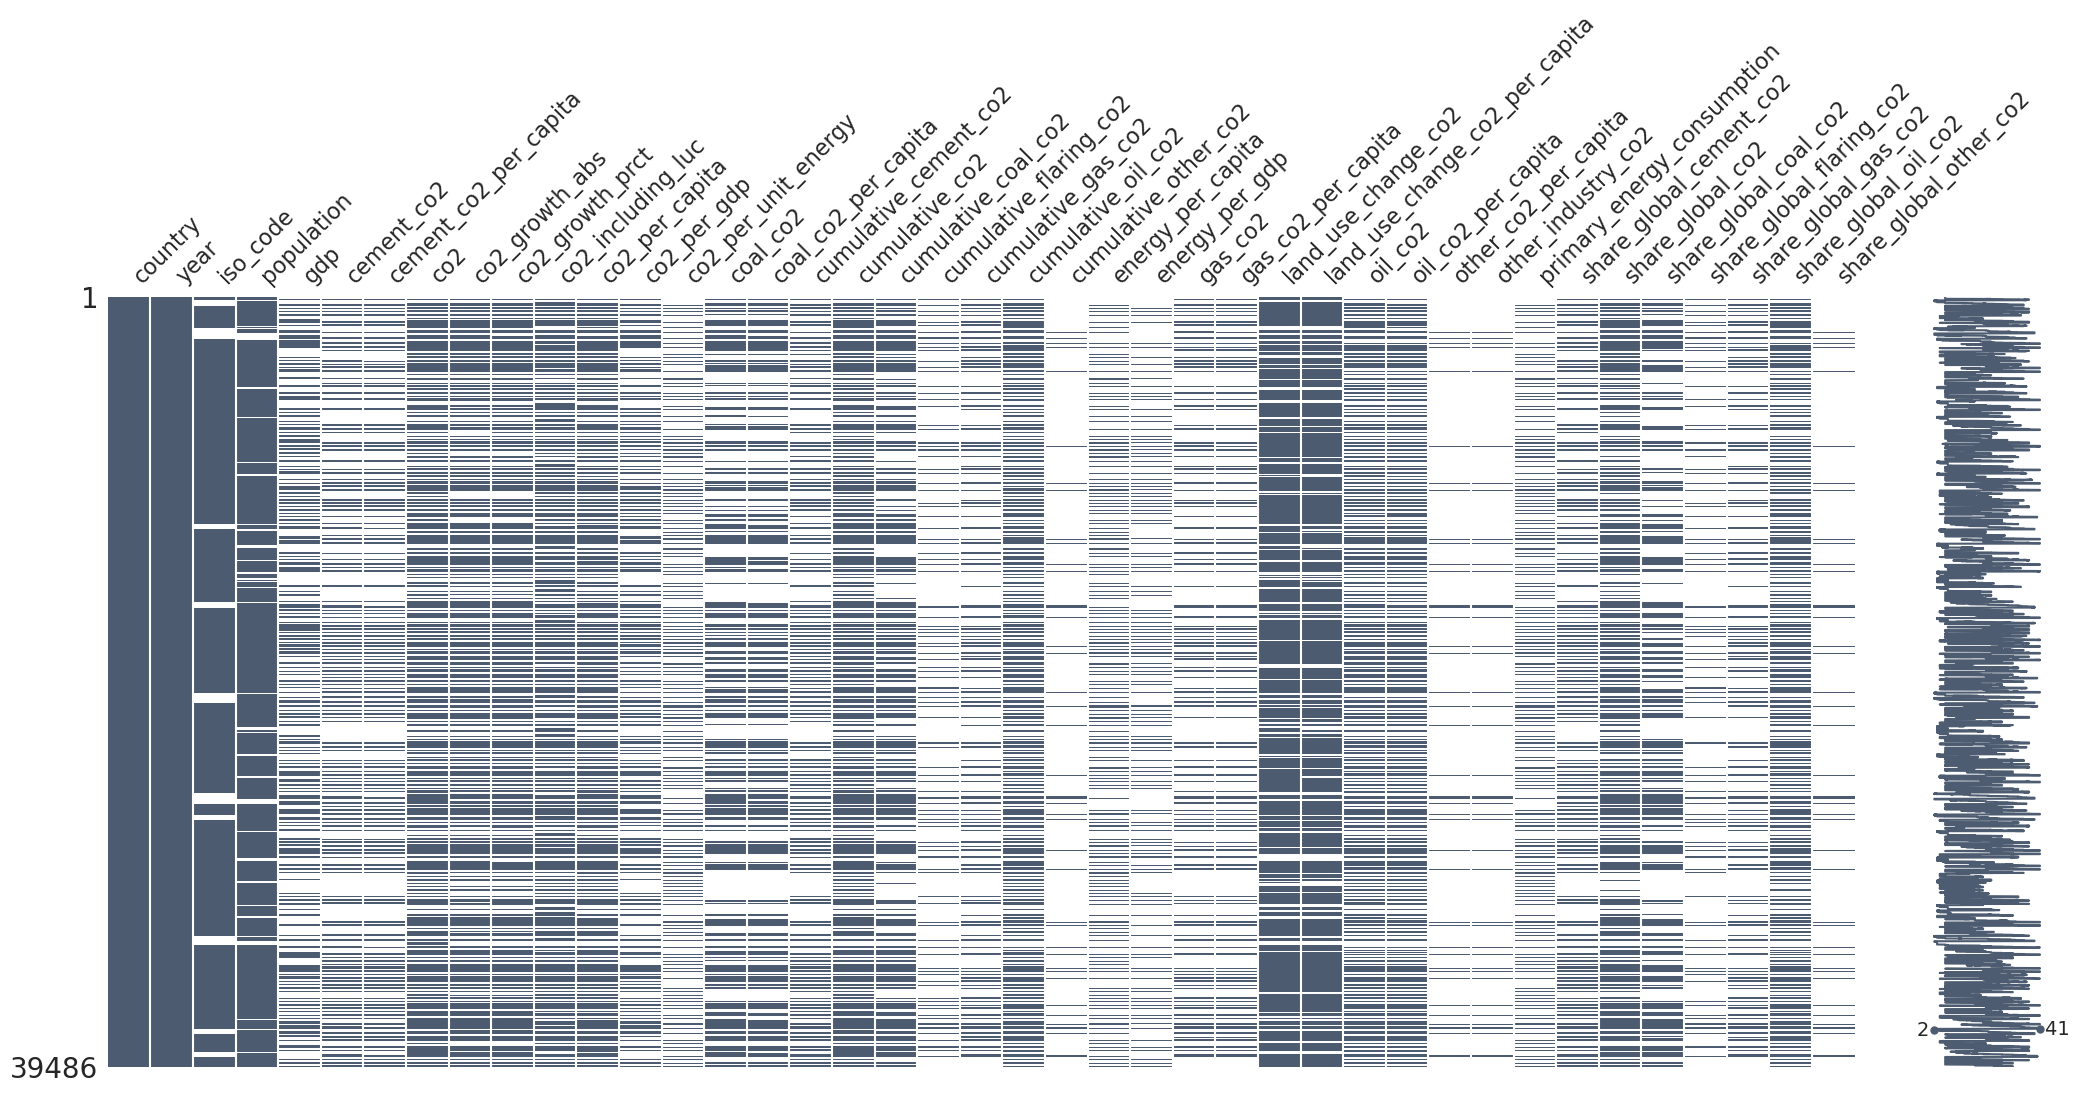

In [28]:
msno.matrix(
    co2_df,
    color = (0.3, 0.36, 0.44)
)

<AxesSubplot:>

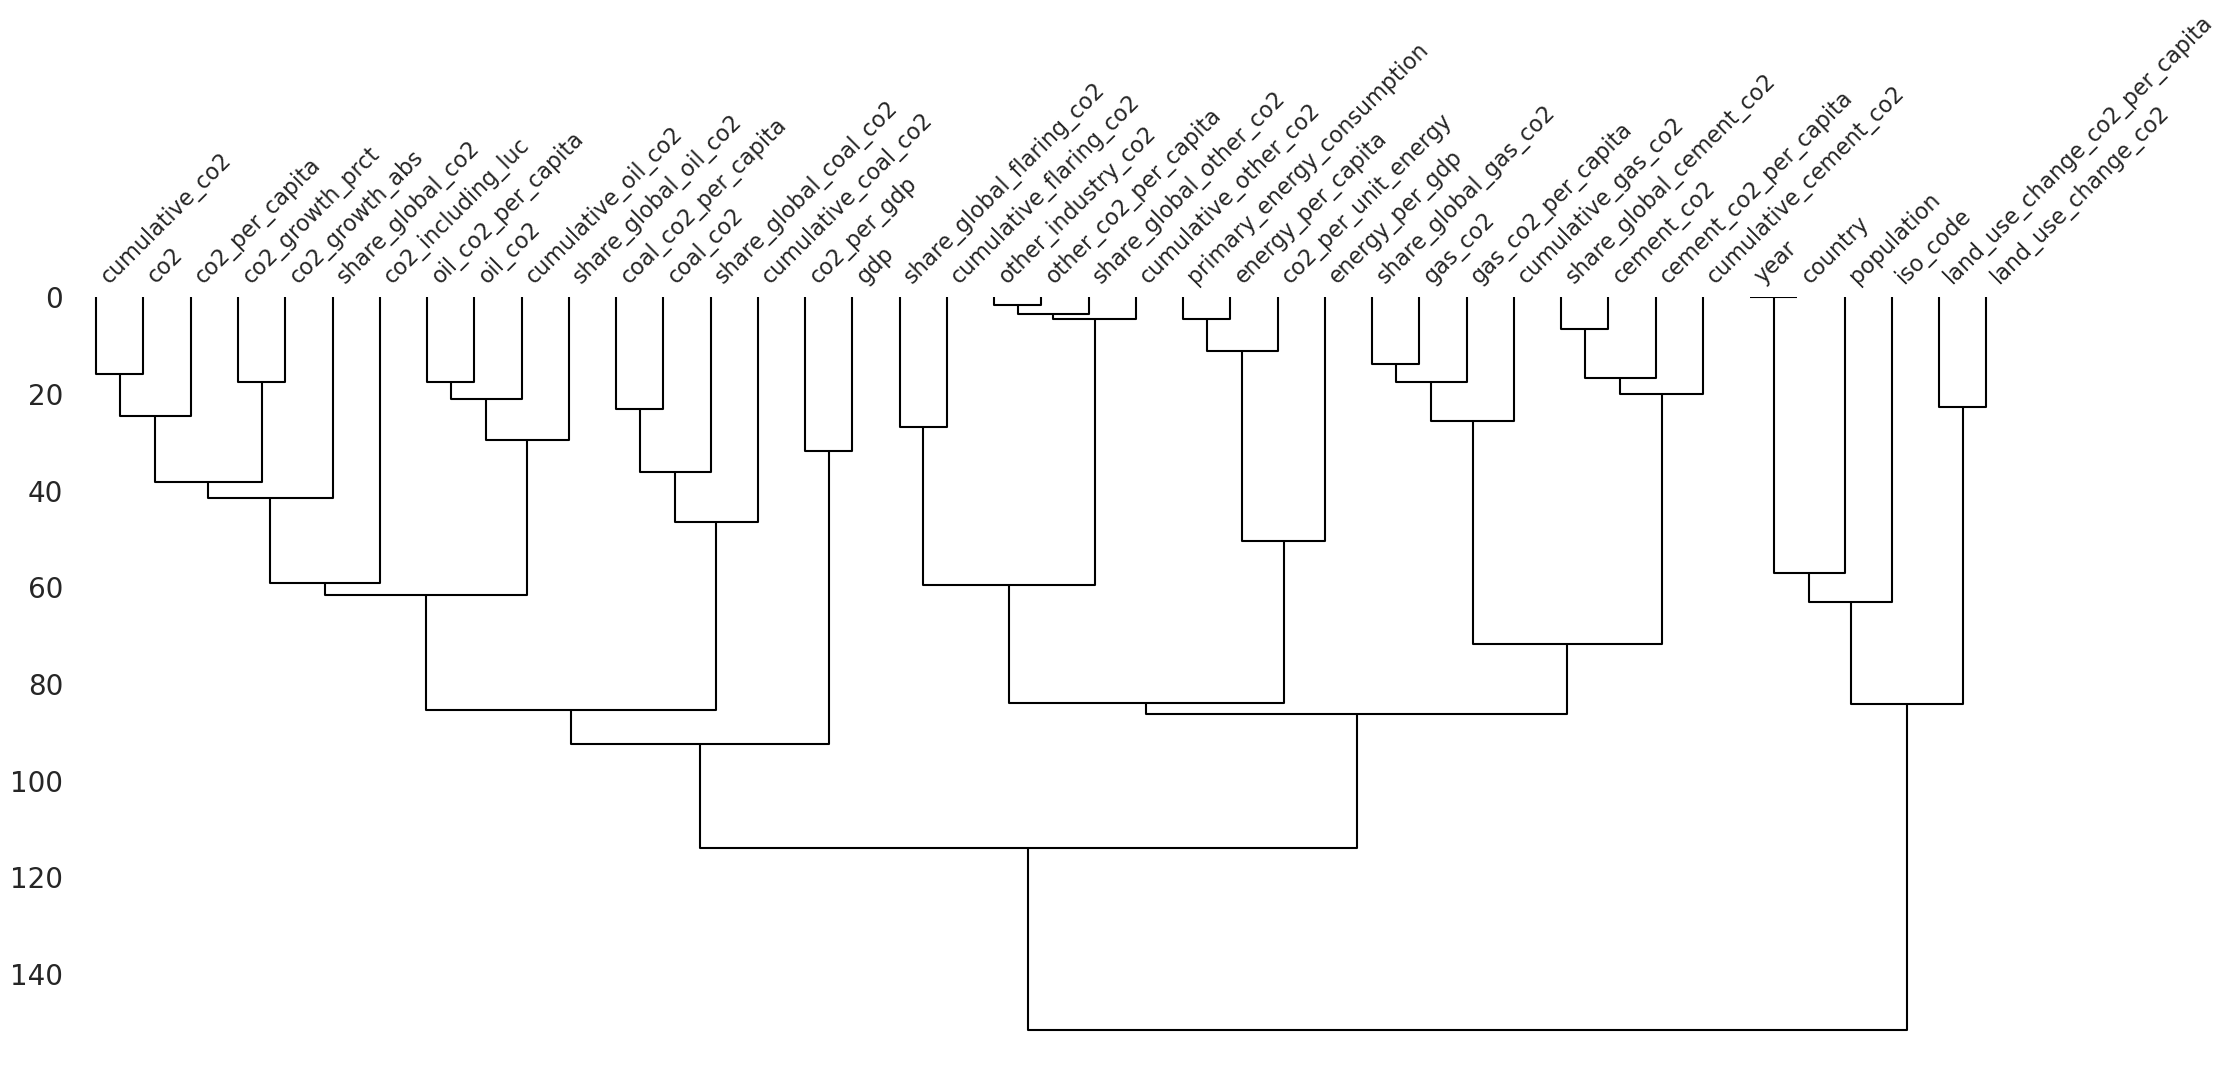

In [29]:
# Analyzing the correlation of missing values
msno.dendrogram(df=co2_df)

The variables that are grouped near the base level indicate that their missing values are very correlated. The more separated the variables are, the less likely their missing values are correlated.

# **Saving the processed data**

In [30]:
co2_df.to_csv("./data/processed_co2.csv")

# **References**

1. 2014: Climate Change 2014: Impacts, Adaptation, and Vulnerability. Part A: Global and Sectoral Aspects. Contribution of Working Group II to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change
[Field, C.B., V.R. Barros, D.J. Dokken, K.J. Mach, M.D. Mastrandrea, T.E. Bilir, M. Chatterjee, K.L. Ebi, Y.O. Estrada, R.C. Genova, B. Girma, E.S. Kissel, A.N. Levy, S. MacCracken, P.R. Mastrandrea, and L.L.White (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, 1132 pp. Available: [Online](https://www.ipcc.ch/report/ar5/wg2/)